# Edge detection

## First order derivative approximation
<ul>
    <li> Prewitt operator</li>    
    <li> Sobel operator</li>
    <li> Robert Edge Detection</li>
</ul>

## Second order derivative

<ul>
    <li> Canny Edge Detection</li>    
    <li> Laplacian of gaussian</li>
</ul>

## Others

<ul>
    <li> Difference of Gaussians </li>
</ul>

##  Edge detection using derivatives
(1) Detecting the local maxima or minima of the first derivative <br>
(2) Detecting the zero-crossings of the second derivative

### Approximation of first derivative (Gradient)
The equivalent masks to compute de parcial derivatives:

$$ \frac{\partial f}{\partial x} => \begin{bmatrix} -1 & 1  \end{bmatrix} $$ 

$$ \frac{\partial f}{\partial y} => \begin{bmatrix} 1 \\ -1  \end{bmatrix} $$ 
<br>

Considering the $ 3 x 3 $ neighborhood $ \begin{bmatrix} a_0 & a_1 & a_2 \\ a_7 & [i,j] & a_3 \\ a_6 & a_5 & a_4 \end{bmatrix} $, then the parcial derivatives can be computed by:

$$ M_x = (a_2 + ca_3 + a_4) - (a_0 + ca_7 + a_6) $$
$$ M_y = (a_6 + ca_5 + a_4) - (a_0 + ca_1 + a_2) $$

<br>

The constant $ c $ inplies the emphasis given to pixels closer to center of the mask.

### Noise in Edge Detection

<ul>
    <li> Differencial masks act as high-pass filter and tend to amplify noise</li>
    <li> To reduce the effects of noise is necessary to smooth the image beforehand with a low-pass filter </li>
    <li>  There is a trade-off between the smoothing process and the edge detection, a larger filter reduces noise, but worsens localization and vice-versa </li>
</ul>

So, the differenciation process could be represented as:


$$ \frac{\partial (h \circledast f)}{\partial x} $$ <br>
$$\frac{\partial (h \circledast f)}{\partial y} $$

$h$ is the low-pass filter and $f$ is the image.

The derivative theorem of convolution allows it to be computed as:

$$ \frac{\partial (h \circledast f)}{\partial x} = \frac{\partial h}{\partial x} \circledast f $$ 

In [67]:
#imports
import numpy as np
import imageio
import matplotlib.pyplot as plt
import math
import cv2 as cv

(-0.5, 639.5, 799.5, -0.5)

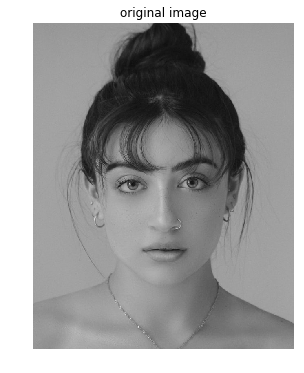

In [68]:
# load the image
filename = "image/jimmy-fermin-bqe0J0b26RQ-unsplash.jpg"
img = cv.imread(filename)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6)) 
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')

(-0.5, 639.5, 799.5, -0.5)

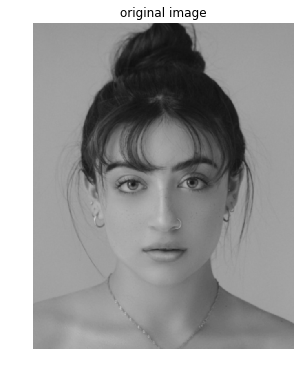

In [5]:
# applying Gaussian blur to reduce the effects of noise
img_gray_gaussian = cv.GaussianBlur(img_gray, (5,5), 0)
plt.figure(figsize=(6,6)) 
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')

### Prewitt operator

$$ M_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} $$

$$ M_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} $$

(-0.5, 639.5, 799.5, -0.5)

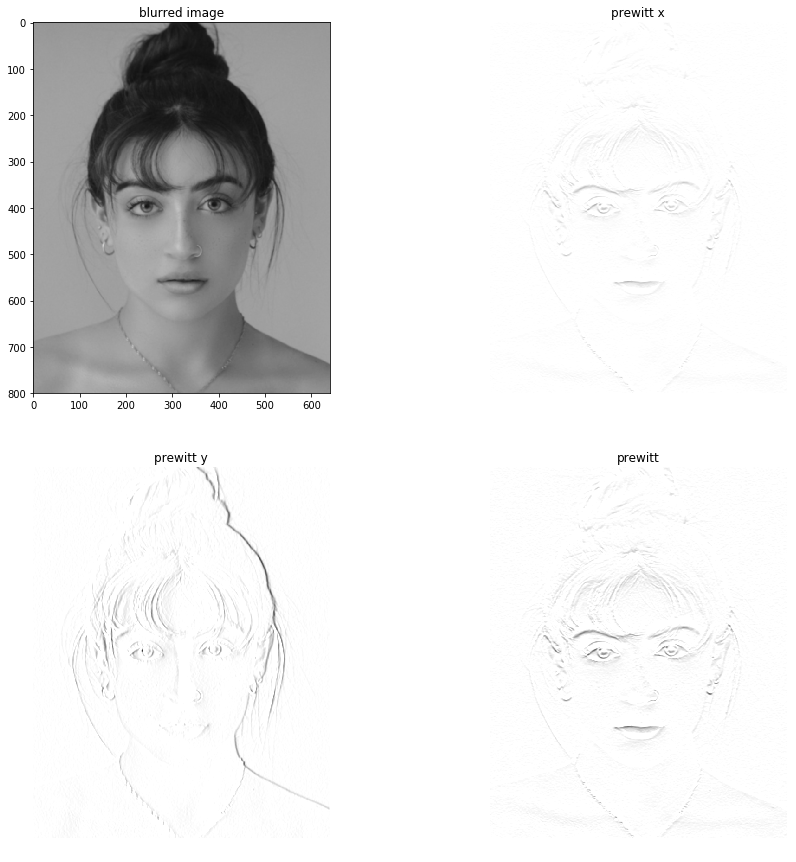

In [6]:
Mx = np.array([[-1,-1,-1],[1,1,1],[0,0,0]])
My = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img_gray_gaussian, -1, Mx)
img_prewitty = cv.filter2D(img_gray_gaussian, -1, My)
img_prewitt = np.abs(img_prewittx) + np.abs(img_prewittx)
#img_prewitt = img_prewitt.astype(np.uint8)

plt.figure(figsize=(15,15)) 
plt.subplot(221)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(222)
plt.imshow(255 - img_prewittx, cmap="gray", vmin=0, vmax=255)
plt.title("prewitt x")
plt.axis('off')
plt.subplot(223)
plt.imshow(255 - img_prewitty,cmap="gray", vmin=0, vmax=255)
plt.title("prewitt y")
plt.axis('off')
plt.subplot(224)
plt.imshow(255 - img_prewitt,cmap="gray", vmin=0, vmax=255)
plt.title("prewitt")
plt.axis('off')

### Sobel Operator

$$ M_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $$

$$ M_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$

(-0.5, 639.5, 799.5, -0.5)

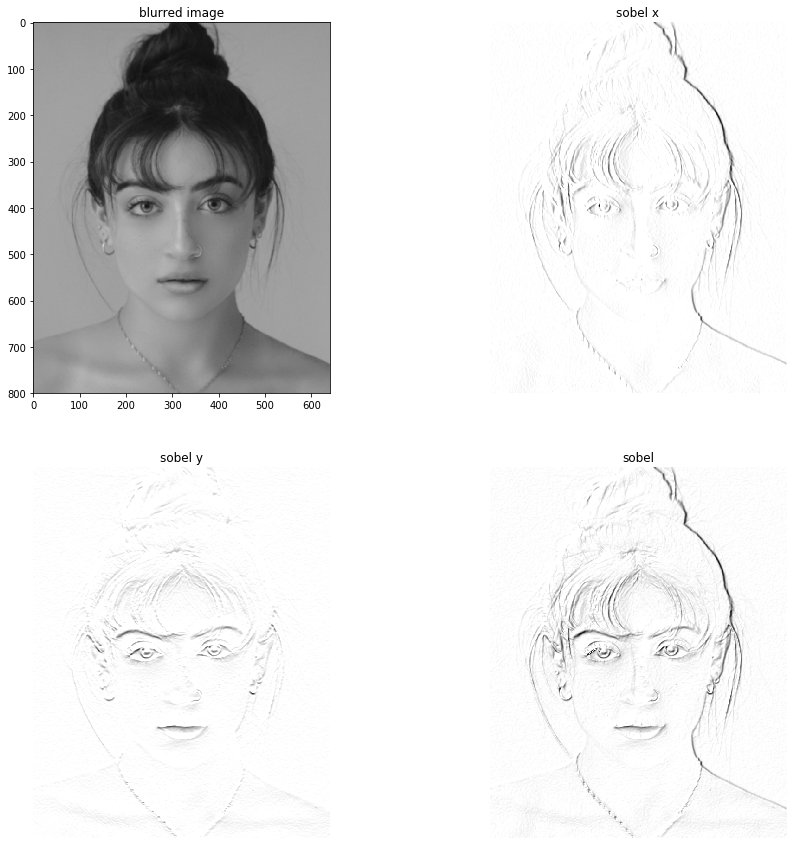

In [7]:
img_sobelx = cv.Sobel(img_gray_gaussian,cv.CV_8U,1,0,ksize=3)
img_sobely = cv.Sobel(img_gray_gaussian,cv.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely

plt.figure(figsize=(15,15)) 
plt.subplot(221)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(222)
plt.imshow(255 - img_sobelx, cmap="gray", vmin=0, vmax=255)
plt.title("sobel x")
plt.axis('off')
plt.subplot(223)
plt.imshow(255 - img_sobely,cmap="gray", vmin=0, vmax=255)
plt.title("sobel y")
plt.axis('off')
plt.subplot(224)
plt.imshow(255 - img_sobel,cmap="gray", vmin=0, vmax=255)
plt.title("sobel")
plt.axis('off')

### Robert Edge Detection

$$ M_x = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ M_y = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} $$

(-0.5, 639.5, 799.5, -0.5)

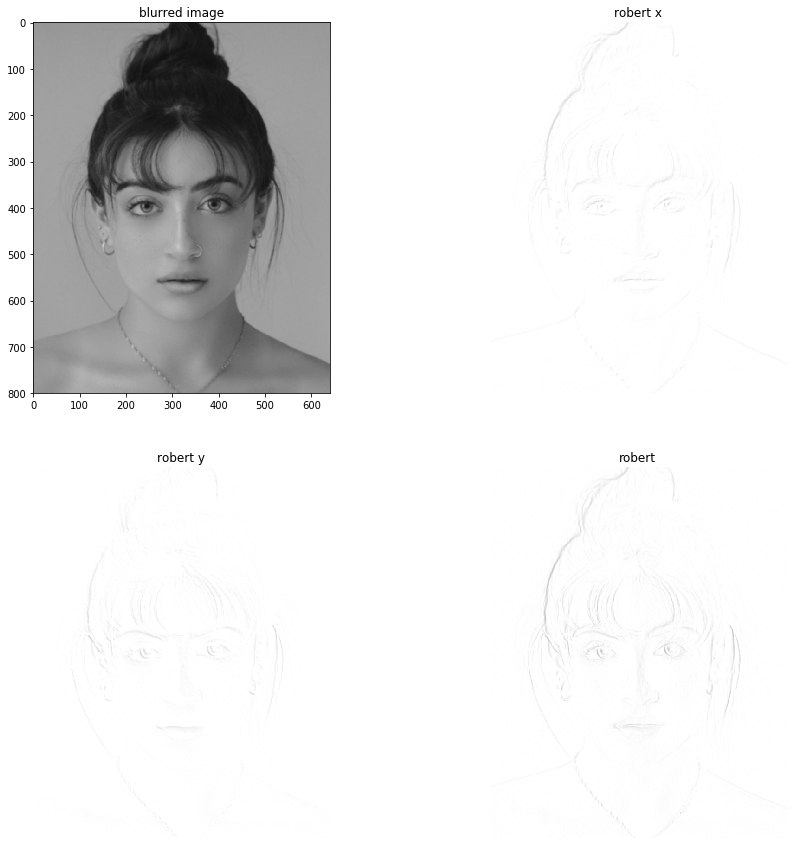

In [8]:
Mx = np.array([[1,0],[0,-1]])
My = np.array([[0,-1],[1,0]])
img_robertx = cv.filter2D(img_gray_gaussian, -1, Mx)
img_roberty = cv.filter2D(img_gray_gaussian, -1, My)
img_robert = np.abs(img_robertx) + np.abs(img_roberty)

plt.figure(figsize=(15,15)) 
plt.subplot(221)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(222)
plt.imshow(255 - img_robertx, cmap="gray", vmin=0, vmax=255)
plt.title("robert x")
plt.axis('off')
plt.subplot(223)
plt.imshow(255 - img_roberty,cmap="gray", vmin=0, vmax=255)
plt.title("robert y")
plt.axis('off')
plt.subplot(224)
plt.imshow(255 - img_robert,cmap="gray", vmin=0, vmax=255)
plt.title("robert")
plt.axis('off')

## Canny Edge Detection

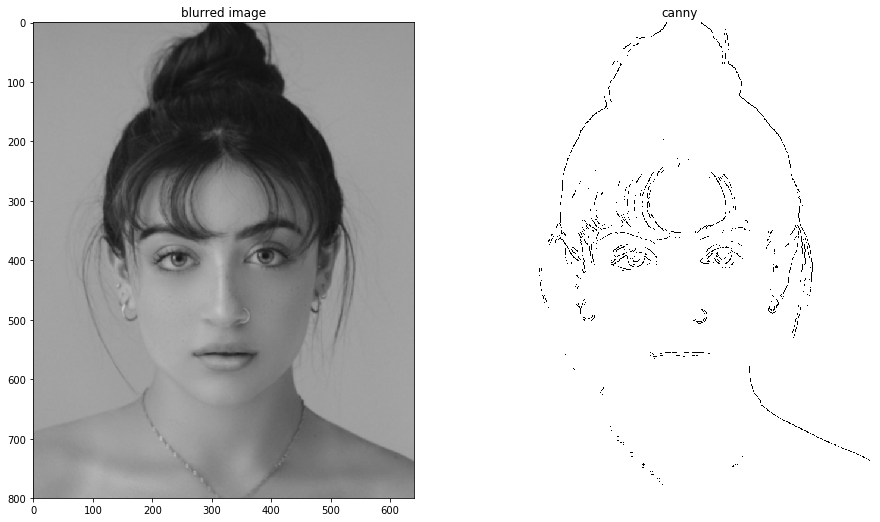

In [9]:
img_canny = cv.Canny(img_gray_gaussian,100,100)

plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(122)
plt.imshow(255 - img_canny, cmap="gray", vmin=0, vmax=255)
plt.title("canny")
plt.axis('off')
plt.show()

## Laplacian of Gaussian

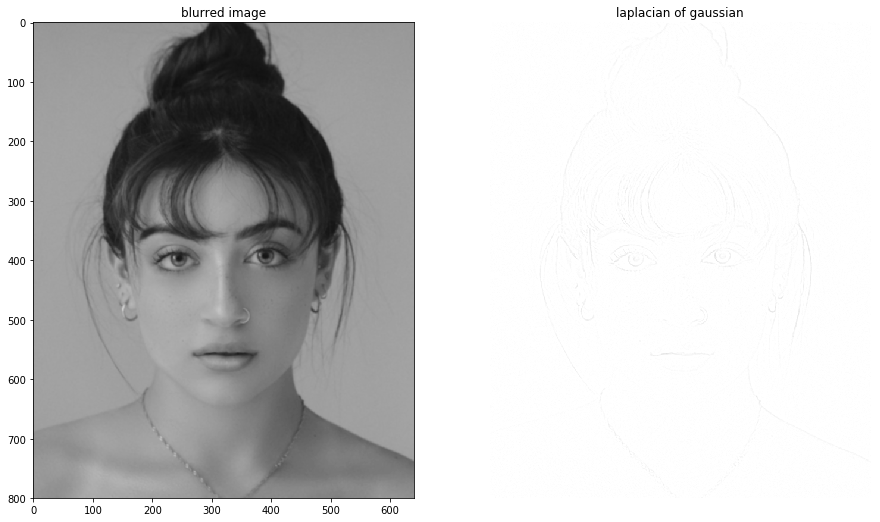

In [10]:
img_laplacian = cv.Laplacian(img_gray_gaussian, cv.CV_16S, 3)

plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(122)
plt.imshow(255 - img_laplacian, cmap="gray", vmin=0, vmax=255)
plt.title("laplacian of gaussian")
plt.axis('off')
plt.show()

# Difference of Gaussians

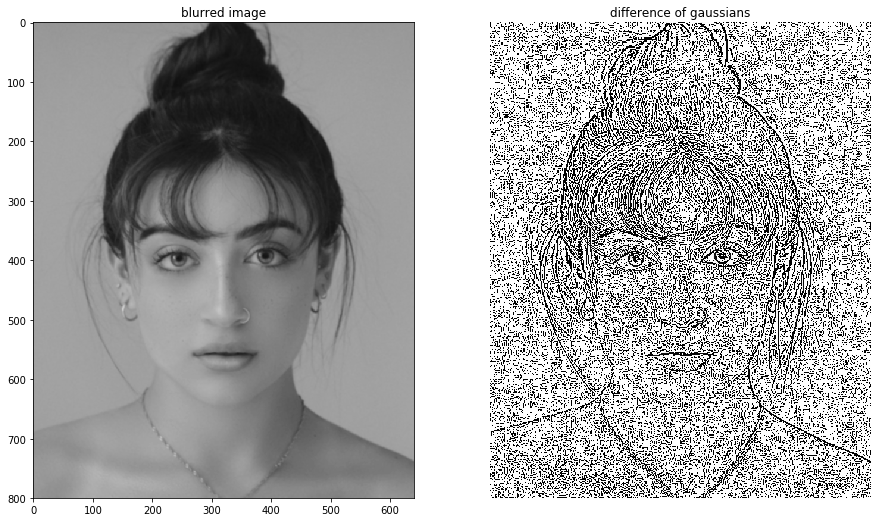

In [11]:
dog = img_gray - img_gray_gaussian

plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(122)
plt.imshow(255 - dog, cmap="gray", vmin=0, vmax=255)
plt.title("difference of gaussians")
plt.axis('off')
plt.show()

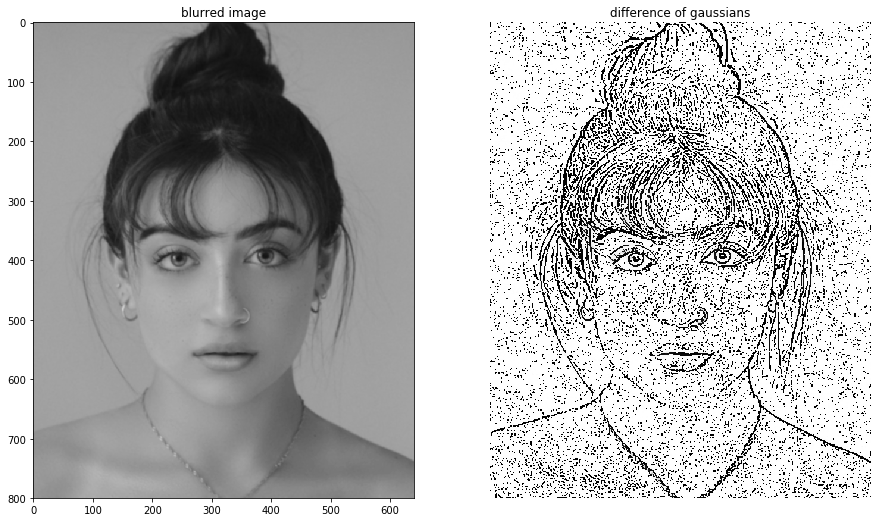

In [12]:
# Applying median filter (n=3) do reduce noise
dog_m3 = cv.medianBlur(dog, 3)

plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(122)
plt.imshow(255 - dog_m3, cmap="gray", vmin=0, vmax=255)
plt.title("difference of gaussians")
plt.axis('off')
plt.show()

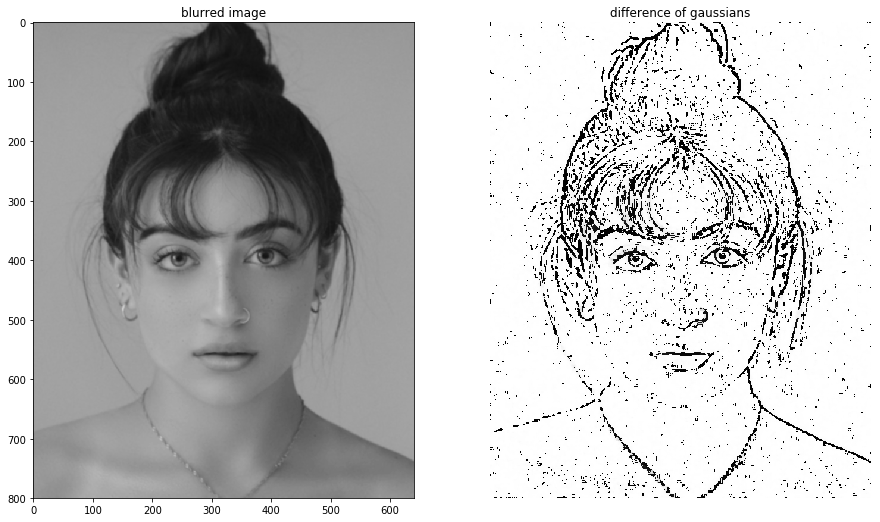

In [13]:
# Applying median filter (n=5) do reduce noise
dog_m5 = cv.medianBlur(dog, 5)

plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(122)
plt.imshow(255 - dog_m5, cmap="gray", vmin=0, vmax=255)
plt.title("difference of gaussians")
plt.axis('off')
plt.show()

In [17]:
def laplacian_of_gaussian(input_img):
    """Function to perform unsharp mask with Laplacian filter
    Arguments:
        img -- input image
        c -- weigth which multiplies the sharpness mask  (<= 1 attenuates the contribution of the sharpness mask)
        kernel -- type of Laplacian filter (1 or 2)
    """  
    
    k = np.array(([0,0,1,0,0],[0,1,2,1,0],[1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]))
    
    a = 2 # filter is 5 x 5, so n=2a+1 -> 5=2a+1 -> a = 2
   
    # # padding image with 0s
    f = np.pad(input_img, (a,a), 'constant').astype(np.int32)
    
    # Applying the convolution between the image and the laplacian filter
    N,M = f.shape
    g = np.array(f, copy=True)
    g = np.zeros(input_img.shape)
    for x in range(a,N-a):
           for y in range(a,M-a):
                sub_f = f[ x-a : x+a+1 , y-a:y+a+1 ]
                g[x-a,y-a] = np.sum(np.multiply(sub_f, k))
    
    return g

In [23]:
out = laplacian_of_gaussian(img_gray_gaussian)

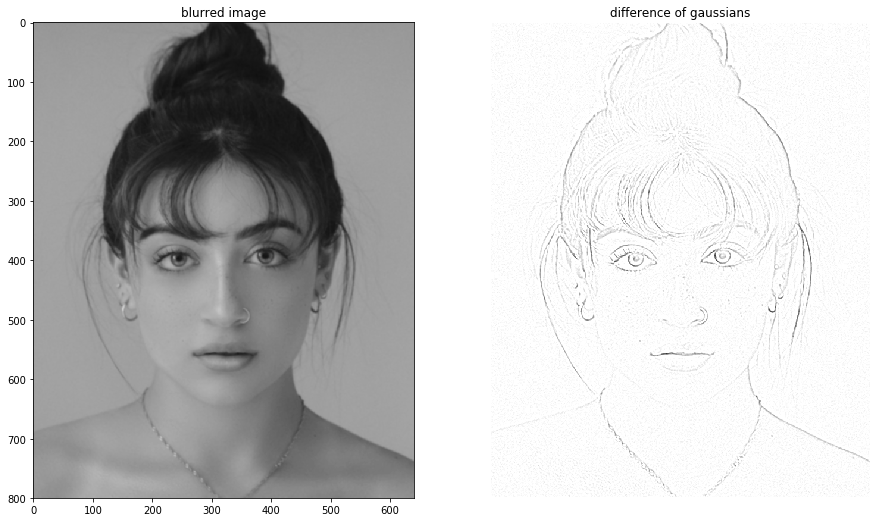

In [25]:
plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(122)
plt.imshow(255 - out, cmap="gray", vmin=0, vmax=255)
plt.title("difference of gaussians")
plt.axis('off')
plt.show()

In [82]:
ret,thresh1 = cv.threshold(out,10,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(out,10,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(out,10,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(out,10,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(out,10,255,cv.THRESH_TOZERO_INV)

ret,th1 = cv.threshold(out,127,255,cv.THRESH_BINARY)

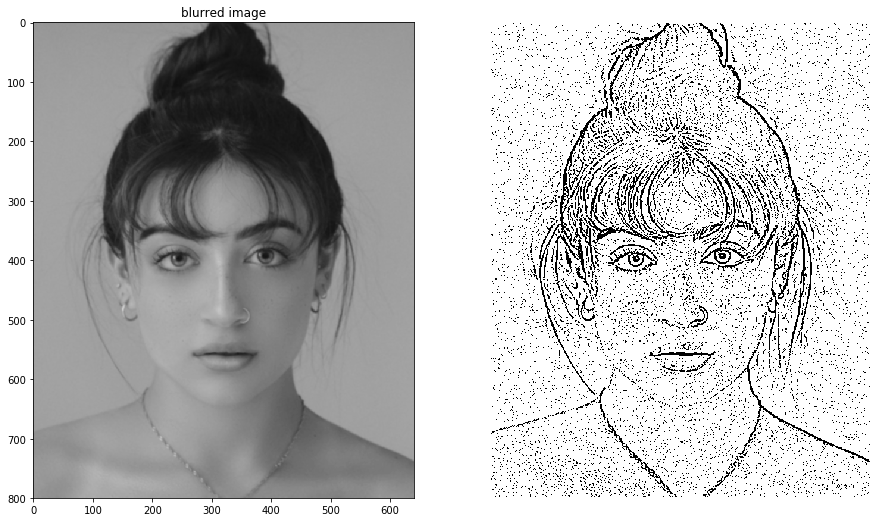

In [83]:
plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(122)
plt.imshow(255 - thresh1, cmap="gray", vmin=0, vmax=255)
plt.title("")
plt.axis('off')
plt.show()

In [85]:
def median_filter(input_img, n):
    
    a = int((n-1) / 2)
    f = np.pad(input_img, (a,a), 'constant').astype(np.int32)
    N,M = f.shape
    g = np.array(f, copy=True)
    g = np.zeros(input_img.shape)
    for x in range(a,N-a):
           for y in range(a,M-a):
                sub_f = f[ x-a : x+a+1 , y-a:y+a+1 ]
                g[x-a,y-a] = np.median(sub_f)
                
    return g

In [89]:
x = median_filter(out, 5)

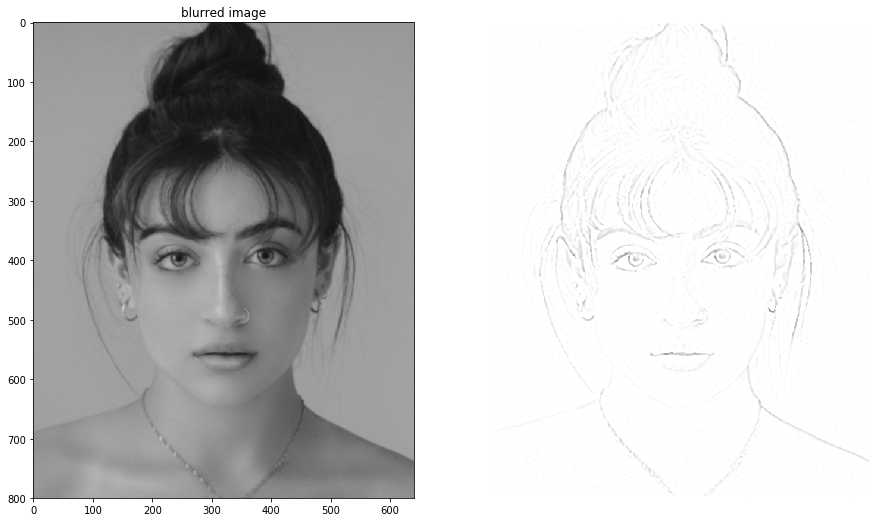

In [90]:
plt.figure(figsize=(15,15)) 
plt.subplot(121)
plt.imshow(img_gray_gaussian, cmap="gray", vmin=0, vmax=255)
plt.title("blurred image")
plt.subplot(122)
plt.imshow(255 - x, cmap="gray", vmin=0, vmax=255)
plt.title("")
plt.axis('off')
plt.show()